# Naive Bayes: a probabilistic classification algorithm

* Naive Bayes est un algorithme de classification probabiliste.
* Étant donné une instance $\mathbf x=[x_1,\dots x_d]$ et un ensemble de valeurs cibles $y_1, \dots, y_k$, 
* Il calculera toutes les probabilités conditionnelles :
$$P(y_i|\mathbf x), y_i \in \{y_1, \dots y_k\}$$
* et prédit la valeur cible $y_i$ qui a la plus grande probabilité $P(y_i|\mathbf x)$.



*  Pour calculer $P(y_i|\mathbf x)$ il utilise le théorème de Bayes 
$$
 P(y_i|\mathbf x) =\frac{P(\mathbf x|y_i) p(y_i)}{P(\mathbf x)} 
$$
et une hypothèse simplificatrice qui permet de calculer facilement $P(\mathbf x|y_i)$ comme suit :
$$
P(\mathbf x|y_i) = P(x_1|y_i) P(x_2|y_i) \dots P(x_d|y_i)
$$
* Le **modèle** de Naive Bayes est constitué de 
  * toutes les probabilités conditionnelles:  $$ \{ P(x_1 |y_i), \dots, P(x_d |y_i) \}, y_i \in \{y_1, \dots y_k \} $$
  * et des probabilités de classe apiori: $$ \{ p(y_i) \},  y_i \in \{y_1, \dots y_k \} $$
* Le **modèle** de Naive Bayes nous permet de calculer les probabilités cibles pour n'importe quelle instance d'apprentissage

**Naive bayes exemple Titanic**

Prenons l'exemple de Titanic: 
* La variable cible est le **result** et prend des valeurs dans  $\{ \text{mort, surv} \}$
* Une instance $\mathbf x$ a trois attributs prédictifs $\mathbf x = [\text{class, sex, age}]$
* Naive Bayes calculera: 
  * $P(\text{result} =\text{mort} | \mathbf x)$
  * $P(\text{result} =\text{surv} | \mathbf x)$
  
  Voyons comment Naive Bayes procède à l'aide d'un exemple

* Pour déterminer la valeur cible d'une instance donnée, par exemple $\mathbf x = [\text{first, female, enf}]$,  naive Bayes calculera :

\begin{align*}
P(\text{mort}|\text{first, female, enf}) &= \frac{P(\text{first, female, enf|mort})P(\text{mort})}{P(\text{first, female, enf})} \\
                                         &= \frac{P(\text{first|mort})P(\text{female|mort}) P(\text{enf|mort})P(\text{mort})}{P(\text{first, female, enf})} \\
\text{ and } \\
P(\text{surv}|\text{first, female, enf}) &= \frac{P(\text{first, female, enf|surv})P(\text{surv})}{P(\text{first, female, enf})} \\
                                         &= \frac{P(\text{first|surv})P(\text{female|surv}) P(\text{enf|surv})P(\text{surv})}{P(\text{first, female, enf})}
\end{align*}

et sélectionnera la valeur cible ayant la plus grande probabilité. 
* Nous savons déjà, grâce au TP1, comment calculer tous les  $P(\text{first|surv}), P(\text{female|surv}), P(\text{enf|surv}), P(\text{surv})$
* pour trouver la valeur cible ayant la plus grande probabilité, il n'est même pas nécessaire de calculer le denominateur $P(\text{first, female, enf})$, pourquoi?
* En principe, nous pourrions déjà mettre en œuvre Naive Bayes avec tout ce que nous avons vu jusqu'à présent dans le TP -1


Quelles sont donc toutes les probabilités que Naive Bayes doit calculer pour son **modèle** ?
* probabilités conditionnelles:
\begin{align}
  P(\text{class} | \text { surv }  ) & = \{ P(\text{class} = first | \text { surv }), \dots,  P(\text{class} = \text{crew} | \text { surv }) \} \\
  P(\text{class} | \text { mort }  ) & = \{ P(\text{class} = first | \text { mort }), \dots,  P(\text{class} = \text{crew} | \text { mort }) \} \\
  \\
  P(\text{age} | \text { surv }  ) & = \{ P(\text{age} = enf | \text { surv }), P(\text{age} = \text{adu} | \text { surv }) \} \\
 P(\text{age} | \text { mort }  ) & = \{ P(\text{age} = enf | \text { mort }),  P(\text{age} = \text{adu} | \text { mort }) \} \\
 \\
   P(\text{sex} | \text { surv }  ) & = \{ P(\text{sex} = female | \text { surv }), P(\text{sex} = \text{male} | \text { surv }) \} \\
 P(\text{sex} | \text { mort }  ) & = \{ P(\text{sex} = female | \text { mort }),  P(\text{sex} = \text{male} | \text { mort }) \}
 \end{align}
* probabilités apriori
$$ P(\text{result}) = \{ P(\text{mort}), P(\text{surv}) \}$$

Comment ces probabilités sont-elles calculées ?
* nous les calculons à partir de ce que nous appelons un **ensemble d' apprentissage**
* comment sait-on que le modèle appris est de qualité ? 

# Comment évaluer les modèles de classification ?

* Nous pouvons considérer un modèle de classification comme un programme qui, à partir d'une entrée, produit une sortie.
* Nous contrôlons l'exactitude des programmes/codes classiques :
  * en examinant le code
  * en vérifiant si leurs résultats sont corrects compte tenu de certaines entrées pour lesquelles nous connaissons le résultat attendu (par exemple, les tests unitaires)
* L'examen de code ne se conduit pas à des modèles de classification, qui sont très souvent *impénétrables*.
* Cependant, nous pouvons toujours vérifier les résultats (prédictions) qu'ils produisent à partir d'entrées (instances) pour lesquelles nous connaissons la valeur correcte de la variable cible. 
* nous effectuons cette vérification à l'aide de ce que nous appelons un ensemble de test
  * L'ensemble de test est un ensemble d'instances pour lesquelles nous connaissons déjà la valeur de la variable cible
  * *attention* l'ensemble d'apprentissage doit être *différent* de l'ensemble de test

## Comment entraîner et évaluer un modèle ?

Étant donné un ensemble de données, nous le diviserons en deux parties 
* un ensemble d'entraînement qui est utilisé... pour l' *entraînement* du modèle
* et un ensemble de test qui est utilisé... pour *tester* le modèle.

la division sera typiquement aléatoire, 50%-50%, 75%-25%

<img src="trn_tst.png" alt="Model evaluation">

si notre algorithme a des paramètres qui contrôlent son comportement (ce qui n'est pas le cas de Naive Bayes), nous devons évaluer différentes valeurs de paramètres à l'aide d'un ensemble de validation. 

<img src="trn_val_tst.png" alt="Model evaluation">

Nous pouvons répéter l'évaluation (différentes séparations train/test) et indiquer la performance moyenne sur les différentes séparations


### Evaluation measure

Dans les problèmes de classification, nous utiliserons le:
* Taux de bien classés (TBC):
$$ \text{TBC} = \frac{\text{nombre d' instances bien classés}}{\text{nombre total d' instances}} $$
en anglais: accuracy. 
* On peut aussi utiliser l' erreur:
$$ \text{erreur} = 1 - \text{TBC}$$

# Entraînement et évaluation de Naive Bayes (avec des attributs prédictifs qualitatifs)

Comme d'habitude, nous travaillerons avec l'ensemble de données titanic

Nous devons installer le package de Naive Bayes

In [1]:
#cette opération ne doit être effectuée qu'une seule fois, elle installe le package Naive Bayes
#install.packages("e1071")

#mettre le paquet à disposition
library("e1071")

#for latex parsing of equations
library("latex2exp")

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windowsWarning message:
"package 'e1071' was built under R version 3.6.3"Warning message:
"package 'latex2exp' was built under R version 3.6.3"

* Nous disposons d'un ensemble de données d'apprentissage
* Nous appliquons l'algorithme de Naive Bayes sur celui-ci
* et nous obtenons un modèle de Naive Bayes comme résultat

In [2]:
#read data
# avec colClasses, nous contrôlons explicitement les types des différentes variables, 
# les valeurs qui nous intéressent le plus sont 
# factor: variables qualitatives
# numeric: pour les variables quantitatives
myData<- read.table("titanic.csv",header=T,sep=",",colClasses=c("factor", "factor", "factor", "factor"))

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

In [3]:
head(myData)
dim(myData)

class,age,sex,result
first,adu,m,surv
first,adu,m,surv
first,adu,m,surv
first,adu,m,surv
first,adu,m,surv
first,adu,m,surv


[1] 2201    4

In [4]:
#créons l'ensemble de données d'apprentissage
#utilizons 50% des données pour la apprentissage
set.seed(1) #controlled randomness
trainIndex <- sample(1:dim(myData)[1],size=0.5*dim(myData)[1])
trainData <- myData[trainIndex,]
print("Train data")
head(trainData)
dim(trainData)

#et utilisons les restantes pour créer l'ensemble de test
testData <- myData[-trainIndex,]
print("Test data")
head(testData)
dim(testData)

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

[1] "Train data"


,class,age,sex,result
1017,third,enf,m,mort
679,third,adu,m,mort
2177,crew,adu,m,mort
930,third,adu,m,mort
1533,first,adu,f,surv
471,crew,adu,f,surv


[1] 1100    4

[1] "Test data"


,class,age,sex,result
2,first,adu,m,surv
3,first,adu,m,surv
4,first,adu,m,surv
6,first,adu,m,surv
7,first,adu,m,surv
10,first,adu,m,surv


[1] 1101    4

In [5]:
#Train a Naive Bayes on myData.
#The parameter:
# formula=result~.
#sets the target/class variable to be the type.
#and use as predictive variables all the others
#Entraîner un Naive Bayes sur myData.
#Le paramètre :
# formula=result~.
#définit la variable cible/classe comme étant le result
#et utilise comme variables prédictives toutes les autres variables
nb<-naiveBayes(formula=result~.,data=trainData)

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

In [6]:
#Voyons ce que nous avons dans le modèle
nb

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows


Naive Bayes Classifier for Discrete Predictors

Call:
naiveBayes.default(x = X, y = Y, laplace = laplace)

A-priori probabilities:
Y
     mort      surv 
0.6518182 0.3481818 

Conditional probabilities:
      class
Y           crew     first    second     third
  mort 0.4323570 0.1018131 0.1073919 0.3584379
  surv 0.3185379 0.2924282 0.1409922 0.2480418

      age
Y             adu        enf
  mort 0.96513250 0.03486750
  surv 0.92428198 0.07571802

      sex
Y               f          m
  mort 0.07670851 0.92329149
  surv 0.49347258 0.50652742


========================================================================

Les composantes du modèle ont la signification/interprétation suivante :

========================================================================

```A-priori probabilities:
Y                                                    => Y=result, la variable cible
     mort      surv                                  => P(result) = {P(mort),P(surv)}
0.6563636 0.3436364 

Conditional probabilities:                           => P(class| result)
      class
Y            crew      first     second      third
  mort 0.44875346 0.09279778 0.11080332 0.34764543   => P(crew|mort), P(first|mort), ..., P(third|mort)
  surv 0.29365079 0.29629630 0.15873016 0.25132275   => P(crew|surv), P(first|surv), ..., P(third|surv)

      age
Y             adu        enf                         => P(age|result) 
  mort 0.96675900 0.03324100                         => P(adu|mort), P(enf|mort)
  surv 0.90740741 0.09259259                         => P(adu|surv), P(enf|surv)

      sex
Y               f          m                         => P(sex|result)   
  mort 0.07202216 0.92797784                         => P(f|mort), P(m|mort)
  surv 0.45238095 0.54761905                         => P(f|surv), P(m|surv)
  ```

Nous pouvons récupérer les différentes parties du modèle comme suit

In [7]:
#récupérer les comptes de la variable cible
nb$apriori

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

Y
mort surv 
 717  383 

In [8]:
#récupérer les propabilités conditionnelles étant donné la variable cible, P(x|y)
# * propabilités conditionnelles pour les attributs qualitatifs (titanic)
# * moyennes et écarts types conditionnels de classe pour les attributs quantitatifs (iris)

nb$tables

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

$class
      class
Y           crew     first    second     third
  mort 0.4323570 0.1018131 0.1073919 0.3584379
  surv 0.3185379 0.2924282 0.1409922 0.2480418

$age
      age
Y             adu        enf
  mort 0.96513250 0.03486750
  surv 0.92428198 0.07571802

$sex
      sex
Y               f          m
  mort 0.07670851 0.92329149
  surv 0.49347258 0.50652742


In [9]:
#Nous pouvons accéder aux éléments de la liste nb$tables soit par leur nom,
#par exemple, les probabilités conditionnelles de la variable âge sachant la variable cible, P(age|result)
nb$tables$age

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

      age
Y             adu        enf
  mort 0.96513250 0.03486750
  surv 0.92428198 0.07571802

In [10]:
#ou par leur index
#e.g. même chose que ci-dessus mais avec l'index au lieu du nom
nb$tables[[2]]

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

      age
Y             adu        enf
  mort 0.96513250 0.03486750
  surv 0.92428198 0.07571802

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

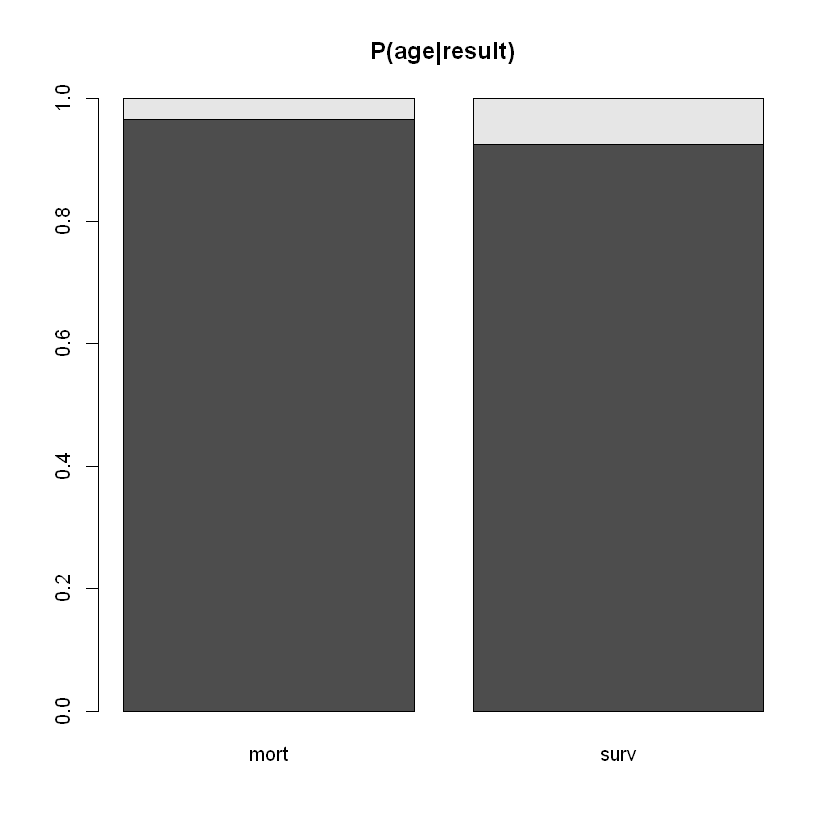

In [11]:
# nous pouvons évidemment visualiser n'importe laquelle des distributions ci-dessus, e.g. P(age|result)
# à l'aide de barplots
barplot(t(nb$tables[[2]]), main="P(age|result)")
# pourquoi avons-nous pris la transposition ? 
# parce que la variable de conditionnement (ici le result) doit correspondre aux barres du diagramme à barres

## évaluation du modèle

In [12]:
#testons le modèle entraîné sur l'ensemble de test que nous avons créé
#predict prend en entrée :
# * le modèle (nb)
# * l'ensemble de test (testData)
#et produit une prédiction pour chaque instance de test
predictions <- predict(nb, testData)
predictions

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

[1] mort mort mort mort mort mort mort mort mort mort mort mort mort mort
  [15] mort mort mort mort mort mort mort surv surv surv surv surv surv surv
  [29] surv surv surv surv surv surv surv surv surv surv surv surv surv surv
  [43] surv surv surv surv surv surv surv surv surv surv surv surv surv surv
  [57] surv surv mort mort mort mort mort mort mort surv surv surv surv surv
  [71] surv surv surv surv surv surv surv surv surv surv surv surv surv surv
  [85] surv surv surv surv surv surv surv surv surv surv mort mort mort mort
  [99] surv surv surv surv surv surv surv surv surv mort mort mort mort mort
 [113] mort mort mort mort mort mort mort mort mort mort mort mort mort mort
 [127] mort mort mort mort mort mort mort mort surv surv surv surv surv surv
 [141] surv surv surv surv surv surv surv surv surv surv surv mort mort mort
 [155] mort mort surv surv mort mort mort mort mort mort mort mort mort mort
 [169] mort mort mort mort mort mort mort mort mort mort mort mort mort mort
 [183] mort mort mort mort mort mort mort mort mort mort mort mort mort mort
 [197] mort mort mort mort mort mort mort mort mort mort mort mort mort mort
 [211] mort mort mort mort mort surv surv surv surv surv mort mort mort mort
 [225] mort mort mort mort mort mort mort mort mort mort mort mort mort mort
 [239] mort mort mort mort mort mort mort mort mort mort mort mort mort mort
 [253] mort mort mort mort mort mort surv mort mort mort mort mort mort mort
 [267] mort mort mort mort mort mort mort mort mort mort mort mort mort mort
 [281] mort mort mort mort mort mort mort mort mort mort mort mort mort mort
 [295] mort mort mort mort mort mort mort mort mort mort mort mort mort mort
 [309] mort mort surv surv surv surv mort mort mort mort mort mort mort mort
 [323] mort mort mort mort mort mort mort mort mort mort mort mort mort mort
 [337] mort mort mort mort mort mort mort mort mort mort mort mort mort mort
 [351] mort mort mort mort mort mort mort mort mort mort mort mort mort mort
 [365] mort mort mort mort mort mort mort mort mort mort mort mort mort mort
 [379] mort mort mort mort mort mort mort mort mort mort mort mort mort mort
 [393] mort mort mort mort mort mort mort mort mort mort mort mort mort mort
 [407] mort mort mort mort mort mort mort mort mort mort mort mort mort mort
 [421] mort mort mort mort mort mort mort mort mort mort mort mort mort mort
 [435] mort mort mort mort mort mort mort mort mort mort mort mort mort mort
 [449] mort mort mort mort mort mort mort mort mort mort mort surv surv surv
 [463] surv surv surv surv surv surv surv surv surv surv surv surv surv surv
 [477] surv surv surv surv surv surv surv surv surv surv mort mort mort mort
 [491] mort mort mort mort mort mort mort mort mort mort mort surv surv surv
 [505] surv mort mort mort mort mort mort mort mort mort mort mort mort mort
 [519] mort mort mort mort mort mort mort mort mort mort mort mort mort mort
 [533] mort mort mort mort mort mort mort mort mort mort mort mort mort mort
 [547] mort mort mort mort mort mort mort mort mort mort mort mort mort mort
 [561] mort mort mort mort mort mort mort mort mort mort mort mort mort mort
 [575] mort mort mort mort mort mort mort mort mort mort mort mort mort mort
 [589] mort mort mort mort mort mort mort mort mort mort mort mort mort mort
 [603] mort mort mort mort mort mort mort mort mort mort mort mort mort mort
 [617] mort mort mort mort mort mort mort mort mort mort mort mort mort mort
 [631] mort mort mort mort mort mort mort mort mort mort mort mort mort mort
 [645] mort mort mort mort mort mort mort mort mort mort mort mort mort mort
 [659] mort mort mort mort mort mort mort mort mort mort mort mort mort mort
 [673] mort mort mort mort mort mort mort mort mort mort mort mort mort mort
 [687] mort mort mort mort mort mort mort mort mort mort mort mort mort mort
 [701] mort mort mort mort mort mort mort mort mort mort mort mort mort mort
 [715] mort mort mort mort mort mort mort mort mort mort mort mort mort mort

In [13]:
#lets check whether we have one prediction/instance
length(predictions)
nrow(testData)

[1] 1101

[1] 1101

In [14]:
#Si nous le souhaitons, nous pouvons produire les probabilités pour chaque valeur cible, 
#au lieu de la prédiction, mais dans le TP, nous nous intéressons principalement aux prédictions.
predictionsWithProbs<-predict(nb, testData, type="raw")
head(predictionsWithProbs)

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

mort,surv
0.5536861,0.4463139
0.5536861,0.4463139
0.5536861,0.4463139
0.5536861,0.4463139
0.5536861,0.4463139
0.5536861,0.4463139


Comment vérifier la qualité de notre modèle ? Comment calculer son taux de bien classées (accuracy) ?
* comparons simplement les prédictions avec les valeurs réelles

In [15]:
testData[,4]==predictions

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [13] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE  TRUE  TRUE
  [25]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
  [37]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
  [49]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE FALSE
  [61] FALSE FALSE FALSE FALSE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
  [73]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
  [85]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE FALSE
  [97] FALSE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE
 [109] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [121] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [133] FALSE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [145]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE FALSE FALSE FALSE FALSE
 [157]  TRUE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [169] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [181] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [193] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [205] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE
 [217]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [229]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [241]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [253]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE
 [265]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [277]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [289]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [301]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE FALSE
 [313] FALSE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [325]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [337]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [349]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [361]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [373]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [385]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [397]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [409]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [421]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [433]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [445]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [457]  TRUE  TRUE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [469] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [481] FALSE FALSE FALSE FALSE FALSE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [493]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE FALSE FALSE
 [505] FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [517]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [529]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [541]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [553]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [565]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [577]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [589]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [601]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRU

In [16]:
#et calculons le nombre de prédictions correctes
numCorrect <- length(which(testData[,4]==predictions))
numCorrect 

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

[1] 870

In [17]:
#ainsi que le taux de bien classes
TBC <- numCorrect/nrow(testData)
TBC

[1] 0.7901907

In [18]:
#Nous pourrions également procéder comme suit pour obtenir le TBC
table(testData[,4],predictions)

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

      predictions
       mort surv
  mort  716   57
  surv  174  154

In [19]:
numCorrect <- sum(diag(table(testData[,4],predictions)))

In [20]:
TBC <- numCorrect/nrow(testData)
TBC

[1] 0.7901907

### Partie théorique de Naive Bayes : comprendre comment le modèle classifie/calcule les probabilités

In [21]:
#Examinons un instance de test particulier, par exemple le premier
testData[1,]
#et les probabilités prédites de mort et de surv
pred1 <- predict(nb, testData[1,],type = "raw")
pred1

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

,class,age,sex,result
2,first,adu,m,surv


mort,surv
0.5536861,0.4463139


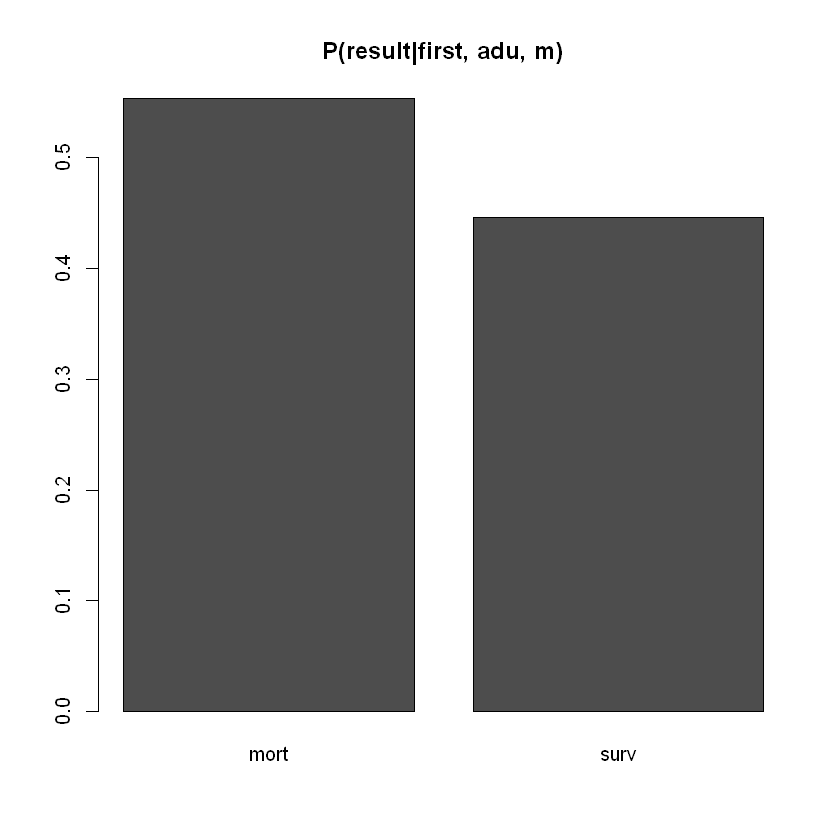

In [22]:
#visualison la distribution des probabilites de result sachant l' instance: first, adu, m
#cad la distribution a posteriori: de P(result|first, adu, m)
barplot(pred1, main="P(result|first, adu, m)")

et voyons comment Naive Bayes utilise les différentes  distributions qu'il a calculées, cad: 
$$ P(\text{class}|\text{result}), P(\text{sex}|\text{result}), P(\text{age}|\text{result}), P(\text{result}) $$
pour calculer ces deux probabilités, cad pour calculer:
$$P(\text{result}|\mathbf x) = \{ P(\text{result}=\text{mort} |\mathbf x), P(\text{result}=\text{surv} |\mathbf x) \}$$
pour notre $\mathbf x = (\text{first}, \text{adu}, \text{m})$

**Rappel**, Naive Bayes calcule $P(y_i|\mathbf x), \forall y_i$, cad ici

$$ P(\text{result}=\text{mort} |\text{first}, \text{adu}, \text{m}), P(\text{result}=\text{surv} |\text{first}, \text{adu}, \text{m}) $$

avec l' aide du *théorème de Bayes* 
$$
 P(y_i|\mathbf x) =\frac{P(\mathbf x|y_i) P(y_i)}{P(\mathbf x)}, \forall y_i 
$$
qui, pour notre instance, est instanciée comme :

\begin{align}
 P(\text{mort} |\text{first}, \text{adu}, \text{m}) & =\frac{P(\text{first}, \text{adu}, \text{m}|\text{mort}) P(\text{mort})}{P(\text{first}, \text{adu}, \text{m})} \\ 
 P(\text{surv} |\text{first}, \text{adu}, \text{m}) & =\frac{P(\text{first}, \text{adu}, \text{m}|\text{surv}) P(\text{surv})}{P(\text{first}, \text{adu}, \text{m})}
\end{align}

alors le modele de Naive Bayes doit calculer:

1.  $P(\text{first}, \text{adu}, \text{m}|\text{mort}), P(\text{first}, \text{adu}, \text{m}|\text{surv})$
2.  $P(\text{mort})$, $P(\text{surv})$
3.  $P(\text{first}, \text{adu}, \text{m})$ 

Nous allons donc examiner chacun d'entre eux et voir où ils se trouvent dans le modèle nb que nous avons entraîné. 

2. Les plus simples sont les $P(\text{mort})$, $P(\text{surv})$ qui sont appelés les probabilités apriori de variable cible. 

Question: D'ailleurs, si nous oublions pour un instant le NB, comment pourrions-nous calculer ces probabilités par nous-mêmes ?

In [23]:
#Get $P(\text{mort})$, $P(\text{surv})$ from the NB model 
#
#1) récupérer les comptes de la variable cible
nb$apriori
#2) à partir de celui-ci, vous devriez pouvoir obtenir les probabilités
classPrior <- prop.table(nb$apriori)
classPrior

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

Y
mort surv 
 717  383 

Y
     mort      surv 
0.6518182 0.3481818 

Voyons maintenant comment calculer les autres probabilités qui apparaissent dans le nominateur

1. $P(\text{first}, \text{adu}, \text{m}|\text{mort}), P(\text{first}, \text{adu}, \text{m}|\text{surv})$

Pour calculer ces probabilités, Naive Bayes utilise l'hypothèse d'indépendance conditionnelle qui permet de calculer facilement $P(\mathbf x|y_i)$ comme suit :
$$
P(\mathbf x|y_i) = P(x_1|y_i) P(x_2|y_i) \dots P(x_d|y_i)
$$
l'hypothèse d'indépendance dans notre cas donnera:

\begin{align}
P(\text{first}, \text{adu}, \text{m}|\text{mort}) &= P(\text{first}|\text{mort}) P(\text{adu}|\text{mort}) P(\text{m}|\text{mort}) \\
P(\text{first}, \text{adu}, \text{m}|\text{surv}) &= P(\text{first}|\text{surv}) P(\text{adu}|\text{surv}) P(\text{m}|\text{surv})\\
\end{align}
alors où trouver: 
$$P(\text{first}|\text{mort}), P(\text{adu}|\text{mort}), P(\text{m}|\text{mort})$$ et 
$$P(\text{first}|\text{surv}) P(\text{adu}|\text{surv}) P(\text{m}|\text{surv})$$ dans le modèle NB?  ou plus généralement de quelles distributions proviennent ces probabilités ?

Question: comme précédemment, seriez-vous en mesure de calculer ces probabilités par vous-même, cad sans NB ?

* $P(\text{first}|\text{mort}), P(\text{first}|\text{surv})$ Ces deux probabilités conditionnelles proviennent donc de la distribution conditionnelle  $P(\text{class}| \text{result})$  
* $P(\text{adu}|\text{mort}), P(\text{adu}|\text{surv})$ Ces deux probabilités conditionnelles proviennent donc de la distribution conditionnelle  $P(\text{age}| \text{result})$ 
* $P(\text{m}|\text{mort}), P(\text{m}|\text{surv})$ Ces deux probabilités conditionnelles proviennent donc de la distribution conditionnelle  $P(\text{sex}| \text{result})$

Voyons donc où nous les trouvons dans le modèle de la NB:

In [24]:
#P(class|result)
nb$tables$class

      class
Y           crew     first    second     third
  mort 0.4323570 0.1018131 0.1073919 0.3584379
  surv 0.3185379 0.2924282 0.1409922 0.2480418


Nous avons besoin de $P(\text{first}|\text{mort}), P(\text{first}|\text{surv})$ que nous pouvons directement extraire par le models de la NB comme suit

In [25]:
#P(first|mort)
nb$tables$class[1,2]

#P(first|surv)

nb$tables$class[2,2]


[1] 0.1018131

[1] 0.2924282

De la même manière, nous pouvons récupérer les probabilités conditionnelles restantes qui sont utilisées dans le nominateur

La dernière chose qui nous manque est donc le dénominateur, cad $P(first, adu, m)$

3. $P(first, adu, m)$

Rappel : Voyons un instant comment nous pourrions calculer la distribution marginale à partir des jointures/conditionnalités, avec ce que nous avons fait dans le TP1. 

Nous savons que:
$$P(\mathbf{x}|y) = \frac{p(\mathbf{x},y)} {p(y)}$$  
et il est facile de s'en rendre compte :
$$P(\mathbf{x}|y) {p(y)} = {p(\mathbf{x},y)} \text{ le nominateur dans NB }$$  

Nous savons également, toujours d'après le TP1, que nous pouvons passer de la joint à la marginal de la manière suivante :
$$ P(\mathbf{x}) = P(\mathbf{x},y_1) + P(\mathbf{x}, y_2) + \dots + P(\mathbf{x},y_K)$$ 
c'est-à-dire en additionnant toutes les probabilités joints pour les différentes valeurs de $y$.


Et on peut reecrire:

$$P(\mathbf{x},y_1) + P(\mathbf{x}, y_2) + \dots + P(\mathbf{x},y_K)=P(\mathbf{x}|y_1) {p(y_1)} + P(\mathbf{x}|y_2) {p(y_2)} + \dots + P(\mathbf{x}|y_K) {p(y_K)}.$$ 

Comme on a deja remarqué les terms:

$$P(\mathbf{x}|y_1) {p(y_1)}, P(\mathbf{x}|y_2) {p(y_2)}, \dots, P(\mathbf{x}|y_K) {p(y_K)}$$

sont celles qui apparaissent dans les nominateurs lorsque nous calculons les probabilités des différentes classes $y_i$.

Voyons donc ce que cela donne dans notre cas où $\mathbf x = (\text{first}, \text{adu}, \text{m})$ and $y \in \{\text{mort}, \text{surv} \}$

\begin{align}
P(\text{first}, \text{adu}, \text{m}) & = P(\text{first}, \text{adu}, \text{m}|\text{mort}) P(\text{mort}) + P(\text{first}, \text{adu}, \text{m}|\text{surv}) p(\text{surv})
\end{align}

En se basant sur l'hypothèse d'indépendance de ΝB, nous avons:

\begin{align}
P(\text{first}, \text{adu}, \text{m}|\text{mort}) P(\text{mort}) + P(\text{first}, \text{adu}, \text{m}|\text{surv}) p(\text{surv}) 
= &   
P(\text{first} |\text{mort}) P(\text{adu} |\text{mort})  P(\text{m} |\text{mort})   P(\text{mort}) + \\
& P(\text{first} |\text{surv}) P(\text{adu} |\text{surv})  P(\text{m} |\text{surv})   P(\text{surv})
\end{align}

So
\begin{align}
P(\text{first}, \text{adu}, \text{m})  = & P(\text{first} |\text{mort}) P(\text{adu} |\text{mort})  P(\text{m} |\text{mort})   P(\text{mort}) + \\
& P(\text{first} |\text{surv}) P(\text{adu} |\text{surv})  P(\text{m} |\text{surv})   P(\text{surv})
\end{align}

le dénominateur est donc la somme de tous les nominateurs. 

Comme nous avons déjà vu comment calculer les nominateurs, il n'est pas trivial de calculer le dénominateur.  

Nous allons donc créer de jolis graphiques qui rassembleront tous les éléments mentionnés ci-dessus et qui apparaîtront dans le calcul suivant:

\begin{align}
 P(\text{mort} |\text{first}, \text{adu}, \text{m}) & =\frac{P(\text{first}, \text{adu}, \text{m}|\text{mort}) P(\text{mort})}{P(\text{first}, \text{adu}, \text{m})} \\
 & = \frac{P(\text{first}|\text{mort}) P(\text{adu}|\text{mort}) P(\text{m}|\text{mort}) P(\text{mort})} {P(\text{first}, \text{adu}, \text{m})}
 \end{align}


Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

,class,age,sex,result
2,first,adu,m,surv


mort,surv
0.5536861,0.4463139


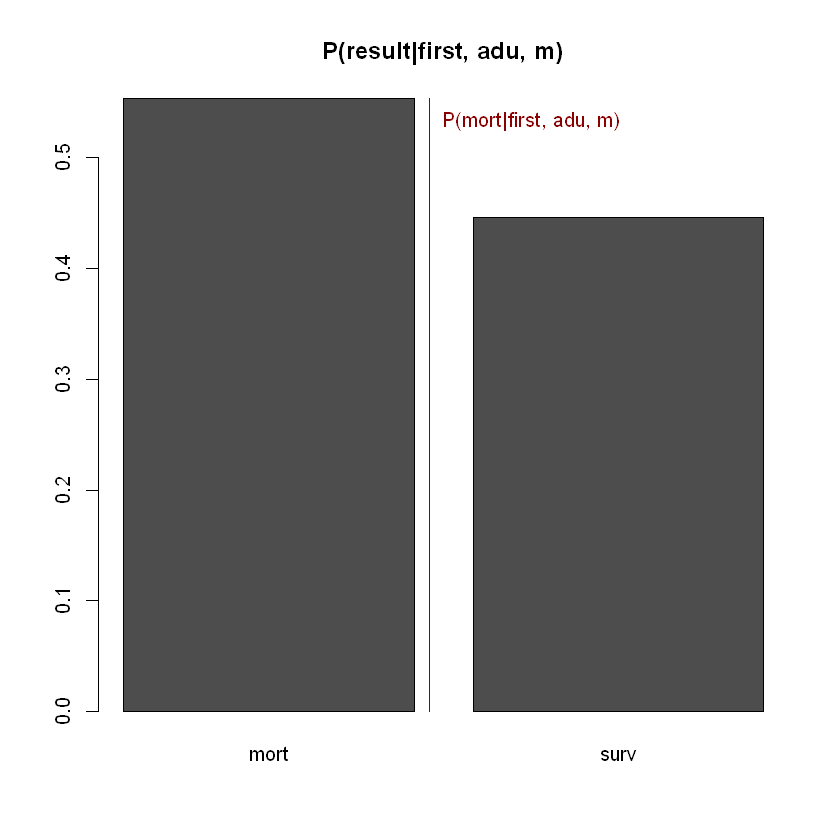

In [26]:
#P(mort|first, adu, m)

#Examinons un instance de test particulier, par exemple le premier
testData[1,]
#et les probabilités prédites de mort et de surv
pred1 <- predict(nb, testData[1,],type = "raw")
pred1

barplot(pred1, main="P(result|first, adu, m)")

points(x=c(1.25,1.25), y=c(0,pred1[1]), type="l",col="darkred")      #vertical line to indicate the probability of P(mort|first, adu, m)
text(x=1.6,y=pred1[1]-0.02, labels="P(mort|first, adu, m)",col="darkred")   
                                                                     


      class
Y           crew     first    second     third
  mort 0.4323570 0.1018131 0.1073919 0.3584379
  surv 0.3185379 0.2924282 0.1409922 0.2480418

[1] "P(first|mort): 0.101813110181311"

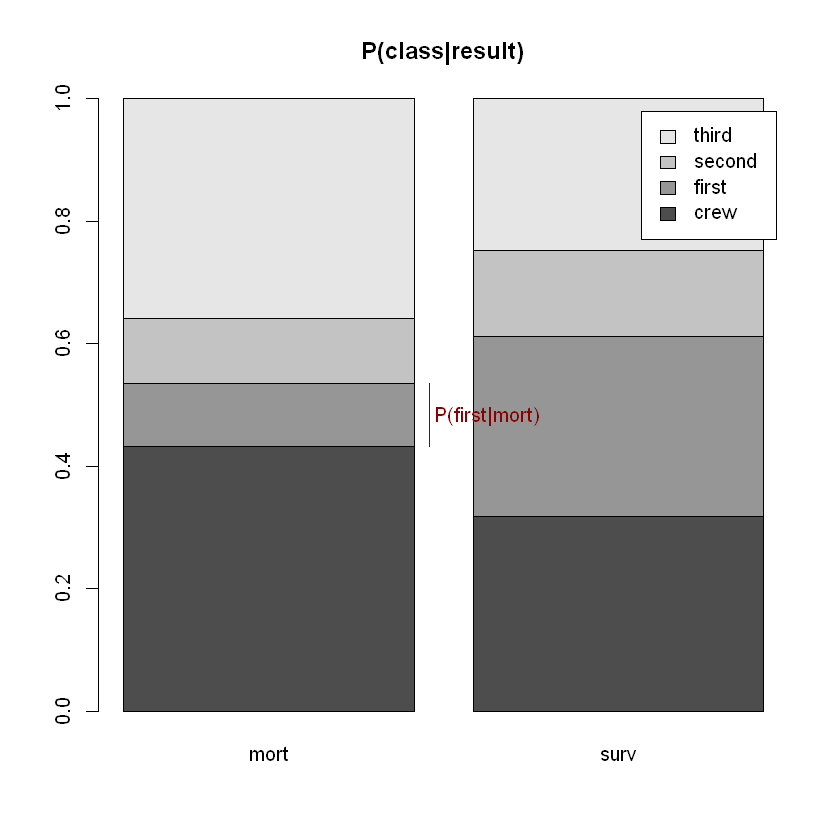

In [27]:
##P(class|result)
nb$tables$class
paste("P(first|mort):", nb$tables$class[1,2])
barplot(t(nb$tables$class),  main="P(class|result)", legend=T)

points(x=c(1.25,1.25), y=c(nb$tables$class[1,1],nb$tables$class[1,1]+nb$tables$class[1,2]), type="l",col="darkred")      #vertical line to indicate the probability of P(first|mort)
text(x=1.45,y=nb$tables$class[1,1]+0.05, labels="P(first|mort)",col="darkred")   
 


      age
Y             adu        enf
  mort 0.96513250 0.03486750
  surv 0.92428198 0.07571802

[1] "P(adu|mort): 0.96513249651325"

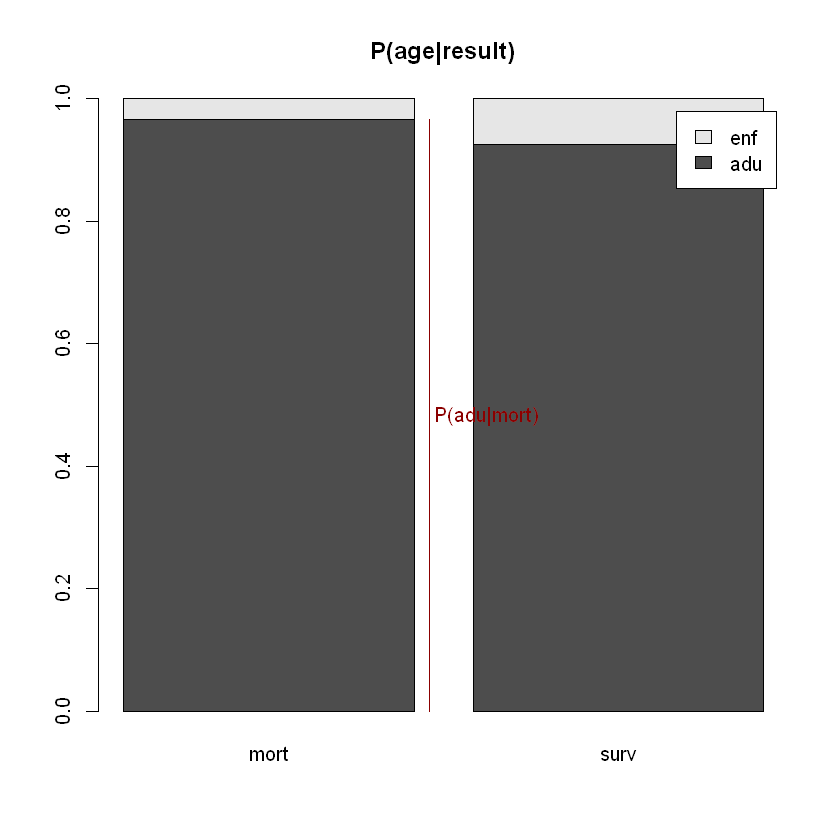

In [28]:
##P(age|result)
nb$tables$age
paste("P(adu|mort):", nb$tables$age[1,1])
barplot(t(nb$tables$age),  main="P(age|result)", legend=T)

points(x=c(1.25,1.25), y=c(0,nb$tables$age[1,1]), type="l",col="darkred")      #vertical line to indicate the probability of P(adu|mort)
text(x=1.45,y=0.4323570+0.05, labels="P(adu|mort)",col="darkred")   
 

      sex
Y               f          m
  mort 0.07670851 0.92329149
  surv 0.49347258 0.50652742

[1] "P(m|mort): 0.923291492329149"

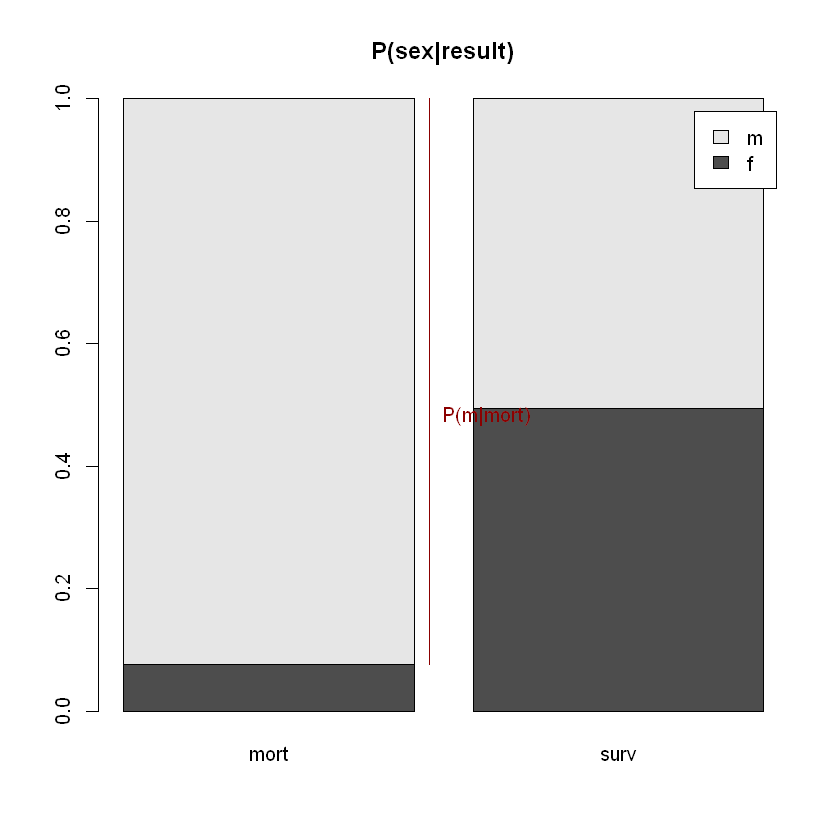

In [29]:
##P(sex|result)
nb$tables$sex
paste("P(m|mort):", nb$tables$sex[1,2])
barplot(t(nb$tables$sex), main="P(sex|result)",legend=T)

points(x=c(1.25,1.25), y=c(nb$tables$sex[1,1],nb$tables$sex[1,1]+nb$tables$sex[1,2]), type="l",col="darkred")      #vertical line to indicate the probability of P(m|mort)
text(x=1.45,y=0.4323570+0.05, labels="P(m|mort)",col="darkred")   



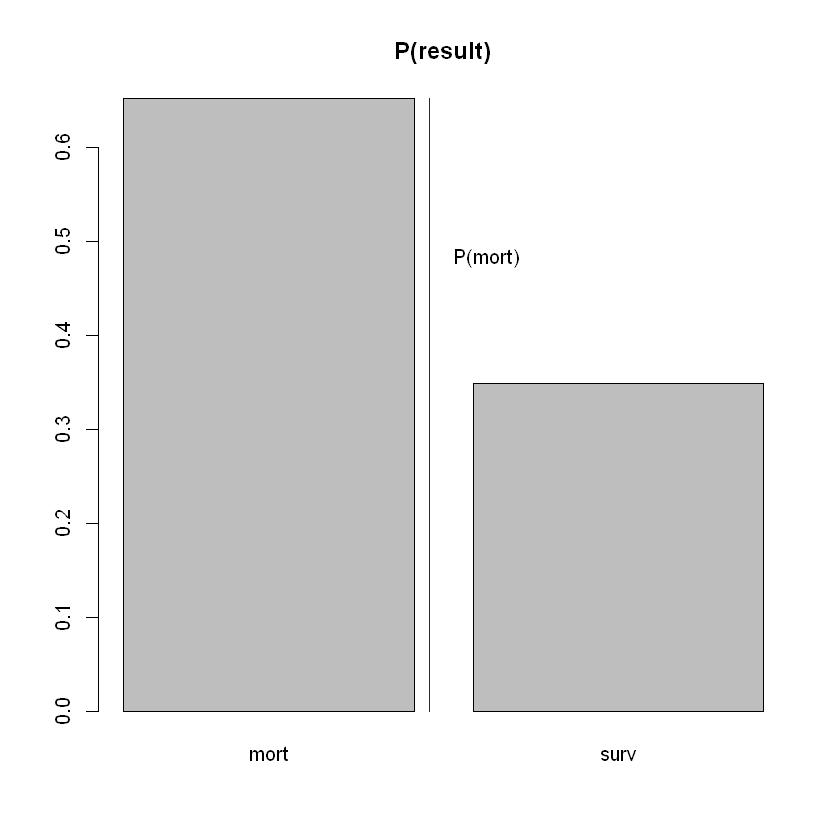

In [30]:
##P(result)
barplot(prop.table(nb$apriori), main="P(result)")

points(x=c(1.25,1.25), y=c(0,prop.table(nb$apriori)[1]), type="l",col="darkred")      #vertical line to indicate the probability of P(mort)
text(x=1.45,y=0.4323570+0.05, labels="P(mort)")   


      class
Y           crew     first    second     third
  mort 0.4323570 0.1018131 0.1073919 0.3584379
  surv 0.3185379 0.2924282 0.1409922 0.2480418

[1] "P(first|mort): 0.101813110181311"

      age
Y             adu        enf
  mort 0.96513250 0.03486750
  surv 0.92428198 0.07571802

[1] "P(adu|mort): 0.96513249651325"

      sex
Y               f          m
  mort 0.07670851 0.92329149
  surv 0.49347258 0.50652742

[1] "P(m|mort): 0.923291492329149"

Y
     mort      surv 
0.6518182 0.3481818 

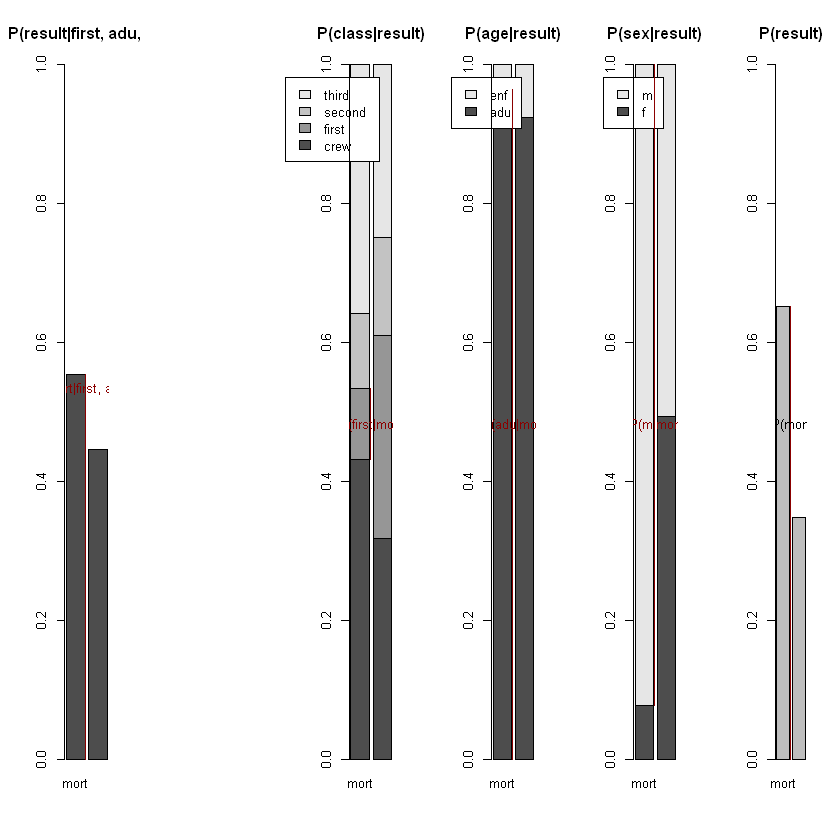

In [31]:
#so lets look at everything together

#lets facilitate our lives and put them next to each other
#par(mfrow = c(1, 5))

layout_matrix <- matrix(c(1, 0, 2, 3, 4, 5), nrow=1)  
layout(layout_matrix,widths=c(1.1,1.1,1.1,1.1,1.1))  


#P(mort|first, adu, m) predicted probability
#barplot(pred1, main="P(result|first, adu, m)", ylim=c(0,1))
barplot(pred1, main="P(result|first, adu, m)", ylim=c(0,1))

points(x=c(1.25,1.25), y=c(0,pred1[1]), type="l",col="darkred")      #vertical line to indicate the probability of P(mort|first, adu, m)
text(x=1.6,y=pred1[1]-0.02, labels="P(mort|first, adu, m)",col="darkred")

##P(class|result)
nb$tables$class
paste("P(first|mort):", nb$tables$class[1,2])
barplot(t(nb$tables$class),  main="P(class|result)", legend=T, ylim=c(0,1))

points(x=c(1.25,1.25), y=c(nb$tables$class[1,1],nb$tables$class[1,1]+nb$tables$class[1,2]), type="l",col="darkred")      #vertical line to indicate the probability of P(first|mort)
text(x=1.45,y=nb$tables$class[1,1]+0.05, labels="P(first|mort)",col="darkred")   
 

##P(age|result)
nb$tables$age
paste("P(adu|mort):", nb$tables$age[1,1])
barplot(t(nb$tables$age),  main="P(age|result)", legend=T, ylim=c(0,1))

points(x=c(1.25,1.25), y=c(0,nb$tables$age[1,1]), type="l",col="darkred")      #vertical line to indicate the probability of P(adu|mort)
text(x=1.45,y=0.4323570+0.05, labels="P(adu|mort)",col="darkred")   
 
##P(sex|result)
nb$tables$sex
paste("P(m|mort):", nb$tables$sex[1,2])
barplot(t(nb$tables$sex), main="P(sex|result)",legend=T,ylim=c(0,1))

points(x=c(1.25,1.25), y=c(nb$tables$sex[1,1],nb$tables$sex[1,1]+nb$tables$sex[1,2]), type="l",col="darkred")      #vertical line to indicate the probability of P(m|mort)
text(x=1.45,y=0.4323570+0.05, labels="P(m|mort)",col="darkred")   

##P(result)
prop.table(nb$apriori)
barplot(prop.table(nb$apriori), main="P(result)", ylim=c(0,1))
points(x=c(1.25,1.25), y=c(0,prop.table(nb$apriori)[1]), type="l",col="darkred")      #vertical line to indicate the probability of P(mort)
text(x=1.45,y=0.4323570+0.05, labels="P(mort)")   


In the above graph we basically demonstrate: 
$$ P(\text{mort} | \text{first, adu, m}) \propto {P(\text{first}|\text{mort}) P(\text{adu}|\text{mort}) P(\text{m}|\text{mort}) P(\text{mort})}$$
i.e. we do not show the computation of the denominator.

## Some exercises

**Exercise** Train a naive bayes model on 70% of the titanic dataset. Extract and visualise from the model the following distributions
* P(result)
* P(age|result)
* P(sex|result)
* P(class|result)

Use the above distributions to explain how the Naive Bayes model will compute the probability of mort and surv for the instance $\mathbf x = (\text{third}, \text{enf}, \text{f})$. 

In [32]:
#code and comments here

**Exercise** Create a function that will receive a dataset (dataframe), the class index, a number of repetitions, and will do a train and test evaluation of naive bayes as many times indicated by the number of repetitions variable. The function should return the average of the estimated accuracies. Test your function on titanic and iris.

In [33]:
#code here
#input:
# dataset:        a data frame with your data
# classIndex:     the index of the class attribute
# numRepetitions: how many times should we do the train and testing
#output: average TBC (Taux de biens classes)
evaluateNB <- function(dataset, classIndex, numRepetitions){
    
    #...
    
    TBC
}